## STA9760 Project 3 - Yahoo Finance Hourly Stock Prices

In [1]:
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Results.csv')

In [3]:
df.head()

,name,high,Datetime,Hour
0,BYND,137.970001,2020-05-14 09:39:00-04:00,9
1,BYND,139.559998,2020-05-14 10:31:00-04:00,10
2,BYND,141.000000,2020-05-14 11:15:00-04:00,11
3,BYND,138.240005,2020-05-14 12:57:00-04:00,12
4,BYND,137.789902,2020-05-14 13:00:00-04:00,13


## Function to convert string -> time

In [4]:
def time_conversion(s):
    s=s.replace('2020-05-14 ','').replace('-04:00','')
    return datetime.datetime.strptime(s, '%H:%M:%S').time()

## Change datatype

In [5]:
df['Datetime']=df['Datetime'].apply(lambda x:time_conversion(str(x)))
df2=df.set_index('Datetime')

## Viz 1: Stock price overtime : PINS vs. SNAP

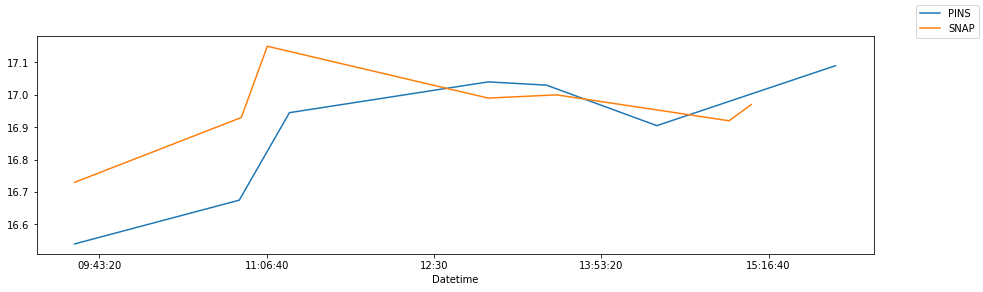

In [6]:
fig = plt.figure(figsize=(15,4))
df2[df2.name.isin(['PINS','SNAP'])].groupby('name')['high'].plot()
fig.legend(loc="upper right")

## Viz 2: Average Percent Change Overtime (all 10 stocks)

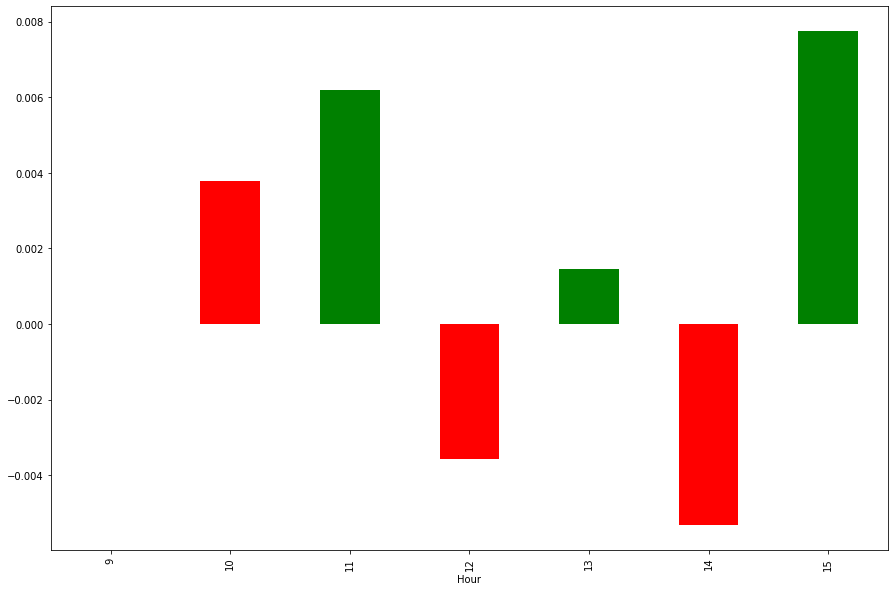

In [7]:
df['% change']=df.groupby(['name'])['high'].pct_change().fillna(0)
dfg=df.set_index(['Datetime'])
fig = plt.figure(figsize=(15,10))
dfg.groupby('Hour')['% change'].mean().plot(kind='bar',color=['g', 'r'])


## Viz 3: Side-By-Side Boxplots showing price distributions

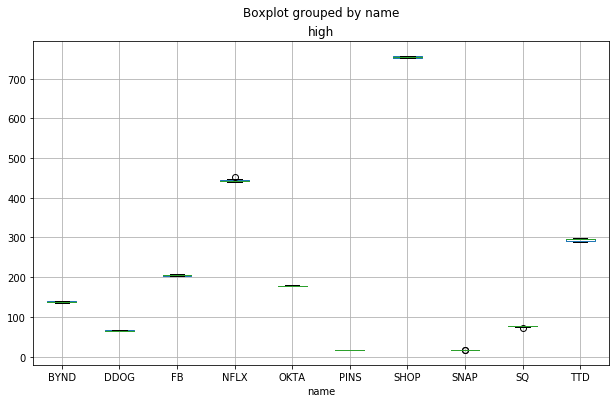

In [17]:

df.boxplot(column='high',by='name',figsize=(10,6))

In [19]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Viz 4: WHICH HOUR had the most daily highest price?

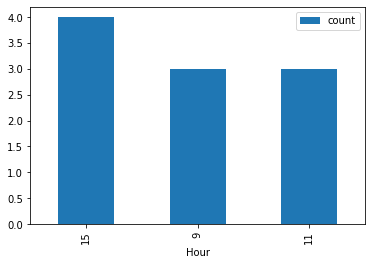

In [55]:
pysqldf("SELECT Hour,count(rank)count FROM(SELECT name,rank() over (PARTITION BY name ORDER BY high DESC) rank,Hour FROM df)sq1 WHERE rank=1 GROUP BY Hour").set_index('Hour').sort_values(by='count',ascending=False).plot(kind='bar')